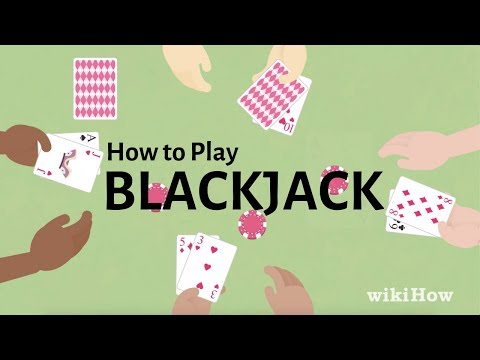

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('eyoh-Ku9TCI')

In [ ]:
import requests
import time
from IPython.display import display, HTML

# Constants for the game
STAND_NUMBER = 17  # When dealer's total value is 17 or more, they will not draw more cards

def initialize_deck():
    """
    Initialize and shuffle a deck of cards.

    Returns
    -------
    str
        The deck_id of the shuffled deck.
    """
    # Hint: Here, we make an API call to create a new shuffled deck and return its ID.
    deck = requests.get('https://www.deckofcardsapi.com/api/deck/new/shuffle/?deck_count=1').json()
    return deck['deck_id']

def draw_card(deck_id, count=1):
    """
    Draw cards from the deck.

    Parameters
    ----------
    deck_id : str
        The ID of the deck to draw cards from.
    count : int, optional
        The number of cards to draw.

    Returns
    -------
    list of dict
        A list of dictionaries, each representing a card.
    """
    # Hint: Make an API call to draw 'count' number of cards from the deck identified by 'deck_id'.
    cards = requests.get(f'https://www.deckofcardsapi.com/api/deck/{deck_id}/draw/?count={count}').json()['cards']
    return cards

def card_value(card):
    """
    Get the numerical value of a card.

    Parameters
    ----------
    card : dict
        A dictionary containing 'suit' and 'value' of the card.

    Returns
    -------
    int
        The numerical value of the card.
    """
    # Hint: Check the card's value and return its numerical equivalent.
    if card['value'] in ['KING', 'QUEEN', 'JACK']:
        return 10
    elif card['value'] == 'ACE':
        return 11
    else:
        return int(card['value'])

def hand_value(hand):
    """
    Calculate the total value of a hand.

    Parameters
    ----------
    hand : list of dict
        A list of dictionaries, each representing a card.

    Returns
    -------
    int
        The total value of the hand.
    """
    # Initialize the total hand value to zero
    total_value = 0

    # Flag to track if the hand contains an ACE
    contains_ace = False

    # Loop through each card in the hand to calculate its value
    for card in hand:
        total_value += card_value(card)

        # Explicitly check for an ACE and set the flag
        if card['value'] == 'ACE':
            contains_ace = True

    # Explicitly handle the case where the hand contains an ACE and the total value is over 21
    if contains_ace and total_value > 21:
        total_value -= 10  # Consider the ACE as '1' instead of '11'

    return total_value

def view_hand(name, hand):
    """
    Display the hand using HTML images.

    Parameters
    ----------
    name : str
        The name of the player (e.g., "Player", "Dealer").
    hand : list of dict
        A list of dictionaries, each representing a card.
    """
    # Hint: Construct HTML to display each card image and the total hand value.
    html = f"<table>{name}<tr>"
    for card in hand:
        html += f'<td><img src="{card["image"]}" style="display:inline;margin:1px" /></td>'
    html += f'<td>{hand_value(hand)}</td><tr><tr>'
    html += "</tr></table>"
    display(HTML(html))

def play_blackjack():
    """
    Play a game of Blackjack against a computer dealer.
    """
    # Initialize and shuffle a deck
    deck_id = initialize_deck()

    # Draw initial cards for player and dealer
    player_hand = draw_card(deck_id, count=2)
    dealer_hand = draw_card(deck_id, count=2)

    while True:
        # Display the hands using HTML images
        view_hand('Player', player_hand)
        view_hand('Dealer', dealer_hand)

        # Hint: Check for Blackjack (a total hand value of 21) for both the player and the dealer.
        if hand_value(player_hand) == 21:
            print("Player has 21. Player wins!")
            return
        if hand_value(dealer_hand) == 21:
            print("Dealer has 21. Dealer wins!")
            return

        # Hint: Handle the player's decision to draw a card or stand.
        draw = input('Do you want to draw a card (yes/no)? ')
        if draw.lower() == 'yes':
            player_hand += draw_card(deck_id, count=1)
            if hand_value(player_hand) > 21:
                print("Player is over 21. Dealer wins!")
                return
        else:
            print("Player stands.")

        # Hint: Handle the dealer's turn based on the game rule (STAND_NUMBER).
        if hand_value(dealer_hand) < STAND_NUMBER:
            print("Dealer draws a card.")
            dealer_hand += draw_card(deck_id, count=1)
            if hand_value(dealer_hand) > 21:
                print("Dealer is over 21. Player wins!")
                return
        else:
            print("Dealer stands.")

        # Hint: Determine the winner if both player and dealer decide to stand.
        if draw.lower() == 'no' and hand_value(dealer_hand) >= STAND_NUMBER:
            if hand_value(player_hand) > hand_value(dealer_hand):
                print("Player wins!")
            elif hand_value(player_hand) < hand_value(dealer_hand):
                print("Dealer wins!")
            else:
                print("It's a tie!")
            return

        time.sleep(1)  # Add a pause before the next round

# Start the game
play_blackjack()
